In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
data=pd.read_csv("clean Data1.csv")
data.drop(columns="Unnamed: 0",inplace=True)

In [10]:
data

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,1.069641,-0.307494,0.023075,0.084501,-1.353460,-0.516504
1,1.040562,0.024634,-0.260254,-0.725297,0.421717,0.815581
2,-0.719094,-0.117552,1.553416,0.926690,0.079808,-0.516640
3,-0.517459,1.254746,-1.424741,-0.587631,-0.187401,0.084417
4,-0.846929,-0.974064,0.868073,0.197872,-1.014003,-1.792644
...,...,...,...,...,...,...
4834,-0.789544,1.921129,-0.864298,-0.425672,-1.379376,-0.513046
4835,0.966365,1.058502,-0.417059,0.027815,-1.090677,0.746204
4836,-0.513007,1.319456,-2.220323,-1.502702,-0.295878,-0.600879
4837,-0.061312,-0.461576,0.146187,1.177727,0.676524,-0.100286


In [12]:
X=data.drop(columns="Price")
Y=data["Price"]

In [16]:
from sklearn.model_selection import train_test_split
# Step 3: Split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=41, test_size=0.20)

In [18]:


# Step 4: Print the shapes
print("Shape of x_train  :", x_train.shape)
print("Shape of x_test   :", x_test.shape)
print("Shape of y_train  :", y_train.shape)
print("Shape of y_test   :", y_test.shape)

Shape of x_train  : (3871, 5)
Shape of x_test   : (968, 5)
Shape of y_train  : (3871,)
Shape of y_test   : (968,)


In [20]:
batch_size=200
epoch=20
hidden_layer1=500
hidden_layer2=400
hidden_layer3=20

ouput_layer=1

input_size=5

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [61]:
# Define and compile the model
def get_model():
    # Use SGD optimizer
    optimizer = SGD(learning_rate=0.01)
    model = Sequential()
    model.add(Dense(hidden_layer1, activation="relu", input_dim=input_size))
    model.add(Dense(hidden_layer2, activation="relu"))
    model.add(Dense(200, activation="relu"))
    model.add(Dense(50, activation="relu"))
    model.add(Dense(ouput_layer, activation="linear"))

    model.summary()
    
    # Compile the model with RMSE loss function
    model.compile(optimizer=optimizer, loss="mse", metrics=["mse"])
    
    return model

In [63]:
Model=get_model()

D:\setups\ancondaInstall\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 500)                 │           3,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 400)                 │         200,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 200)                 │          80,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 50)                  │          10,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 293,701 (1.12 MB)

 Trainable params: 293,701 (1.12 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
from time import time

In [65]:
# Start timing
start_time = time()

# Fit the model
History1=Model.fit(x_train, y_train, epochs=40, validation_split=0.20, verbose=1,batch_size=len(x_train))

# End timing
end_time = time()


# Print total training time
print(f"Total Training Time: {round(end_time - start_time, 1)} seconds")

Epoch 1/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.0133 - mse: 1.0133 - val_loss: 1.0134 - val_mse: 1.0134
Epoch 2/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - loss: 0.9983 - mse: 0.9983 - val_loss: 0.9984 - val_mse: 0.9984
Epoch 3/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - loss: 0.9839 - mse: 0.9839 - val_loss: 0.9840 - val_mse: 0.9840
Epoch 4/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - loss: 0.9698 - mse: 0.9698 - val_loss: 0.9700 - val_mse: 0.9700
Epoch 5/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 0.9563 - mse: 0.9563 - val_loss: 0.9563 - val_mse: 0.9563
Epoch 6/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - loss: 0.9431 - mse: 0.9431 - val_loss: 0.9430 - val_mse: 0.9430
Epoch 7/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - loss: 0.9303 - mse: 0.9303 - val_loss: 0.9300 - val_mse: 0.9300
Epoch 8/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - loss: 0.9177 - mse: 0.9177 - val_loss: 0.9172 - val_mse: 0.9172
Epoch 9/40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 0.9054 - mse: 0.9

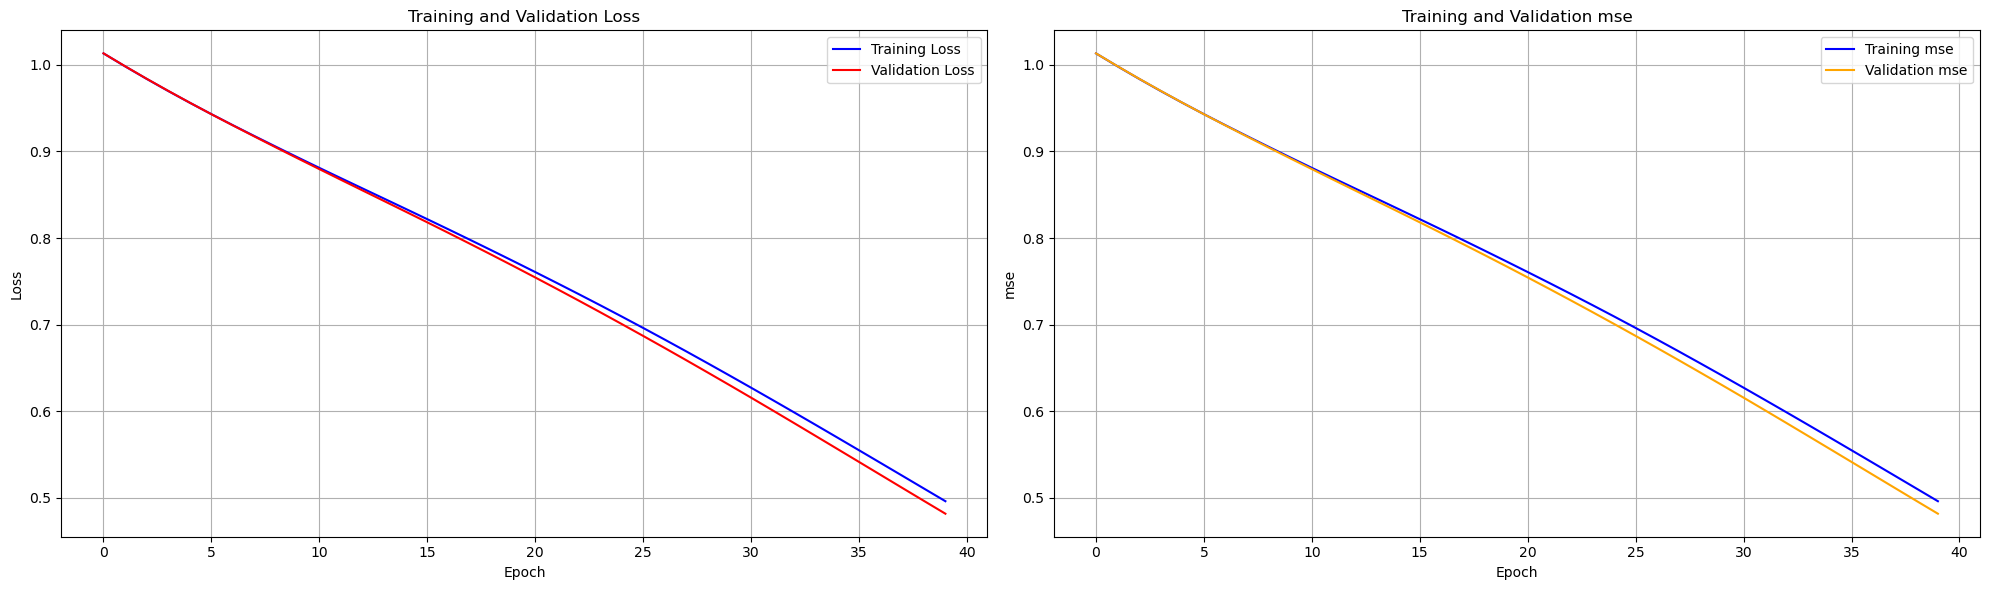

In [67]:
import matplotlib.pyplot as plt

def plot_training_history(history):

    # Retrieve loss and accuracy values
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    mse = history.history['mse']
    val_mse = history.history['val_mse']

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

    # Plot training and validation loss
    ax1.plot(loss, label='Training Loss', color='blue')
    ax1.plot(val_loss, label='Validation Loss', color='red')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)
    # Plot training and validation accuracy
    ax2.plot(mse, label='Training mse', color='blue')
    ax2.plot(val_mse, label='Validation mse', color='orange')
    ax2.set_title('Training and Validation mse')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('mse')
    ax2.legend()
    ax2.grid(True)

    # Adjust layout to prevent overlap
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Example usage
plot_training_history(History1)

In [71]:
prdiction=Model.predict(x_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [73]:
# Function to plot model results
def plot_results(model_name, y_test, predictions):
    plt.figure(figsize=(10, 6))
    plt.plot(y_test.values, label='Actual Values')
    plt.plot(predictions, label='Predicted Values', alpha=0.7)
    plt.title(f'{model_name} Predictions')
    plt.xlabel('Sample Index')
    plt.ylabel('Target Value')
    plt.legend()
    plt.grid(True)
    plt.show()

In [75]:
prdiction=pd.DataFrame(prdiction)
prdiction.rename(columns={0:"Predicted Values"},inplace=True)
prdiction

,Predicted Values
0,0.055453
1,-0.455650
2,-0.357314
3,0.020148
4,0.138378
...,...
963,-0.020908
964,0.183088
965,0.332297
966,0.492986


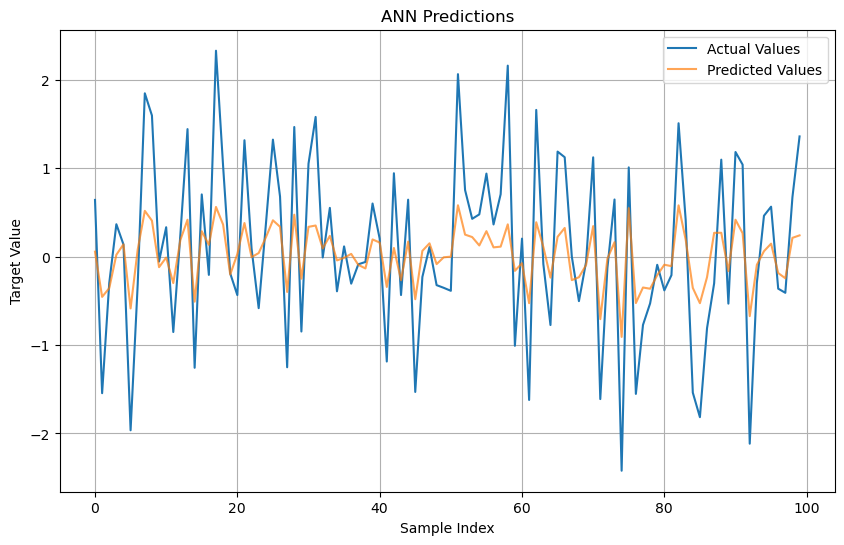

In [79]:
plot_results("ANN",y_test.head(100),prdiction.head(100))

3460    0.640569
172    -1.544610
2511   -0.300381
3445    0.365695
3721    0.136847
          ...   
150     0.449336
303     0.560385
1079    0.161793
3257    1.307624
259     0.564653
Name: Price, Length: 968, dtype: float64

In [83]:
from sklearn.metrics import mean_squared_error
# Calculate MSE
mse = mean_squared_error(y_test, prdiction)

# Calculate RMSE
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error (MSE): 0.4793343994649713
Root Mean Squared Error (RMSE): 0.6923398005784236
